Importing necessary packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

Importing Dataset


In [ ]:
data = pd.read_csv("instagram.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Followers  From Hashtags  From Explore  From Other  \
0         3920            2586           1028           619          56   
1         5394            2727           1838          1174          78   
2         4021            2085           1188             0         533   
3         4528            2700            621           932          73   
4         2518            1704            255           279          37   

   Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0     98         9       5    162              35        2   
1    194         7      14    224              48       10   
2     41        11       1    131              62       12   
3    172        10       7    213              23        8   
4     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn

Before starting everything, let’s have a look at whether this dataset contains any null values or not:

In [ ]:
data.isnull().sum()

Impressions       0
From Followers    0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

So it has a null value in Caption column. Let’s drop all these null values and move further:

In [ ]:
data = data.dropna()

Let’s have a look at the insights of the columns to understand the data type of all the columns:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     99 non-null     int64 
 1   From Followers  99 non-null     int64 
 2   From Hashtags   99 non-null     int64 
 3   From Explore    99 non-null     int64 
 4   From Other      99 non-null     int64 
 5   Saves           99 non-null     int64 
 6   Comments        99 non-null     int64 
 7   Shares          99 non-null     int64 
 8   Likes           99 non-null     int64 
 9   Profile Visits  99 non-null     int64 
 10  Follows         99 non-null     int64 
 11  Caption         99 non-null     object
 12  Hashtags        99 non-null     object
dtypes: int64(11), object(2)
memory usage: 10.8+ KB


ANALYSING INSTAGRAM REACH

Now let’s start with analyzing the reach of Instagram posts. I will first have a look at the distribution of impressions I have received from home:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


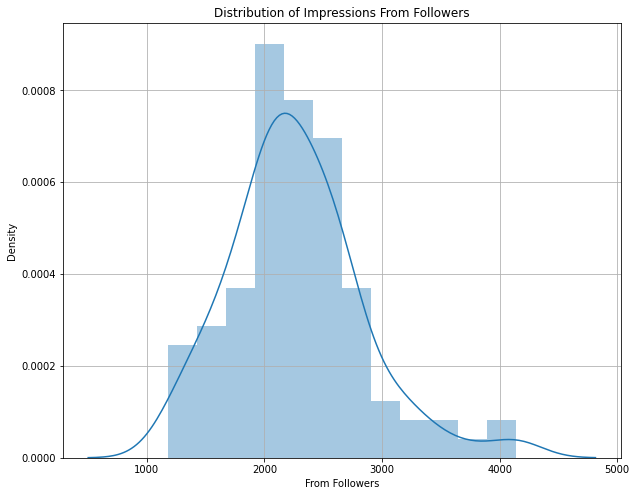

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['From Followers'])
plt.grid()
plt.show()

let’s have a look at the distribution of the impressions I received from hashtags:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


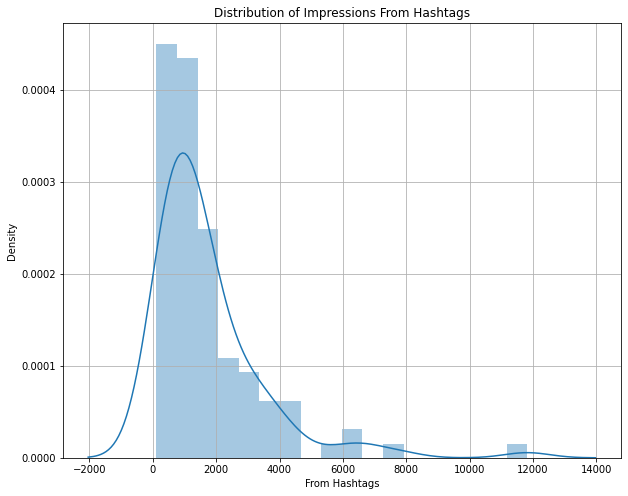

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.grid()
plt.show()

let’s have a look at the distribution of impressions I have received from the explore section of Instagram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


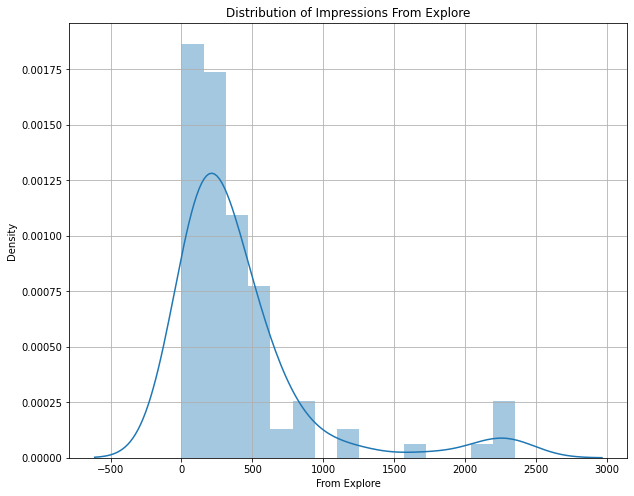

In [ ]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.grid()
plt.show()

 let’s have a look at the percentage of impressions I get from various sources on Instagram

In [ ]:
followers = data["From Followers"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Followers','From Hashtags','From Explore','Other']
values = [followers, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

ANALYZING CONTENT


Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

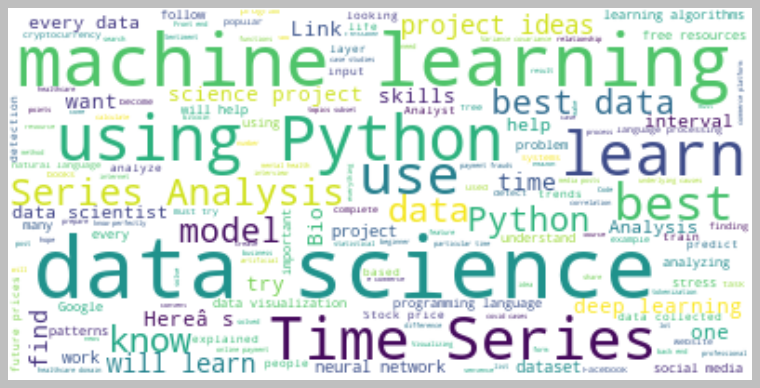

In [ ]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now let’s create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

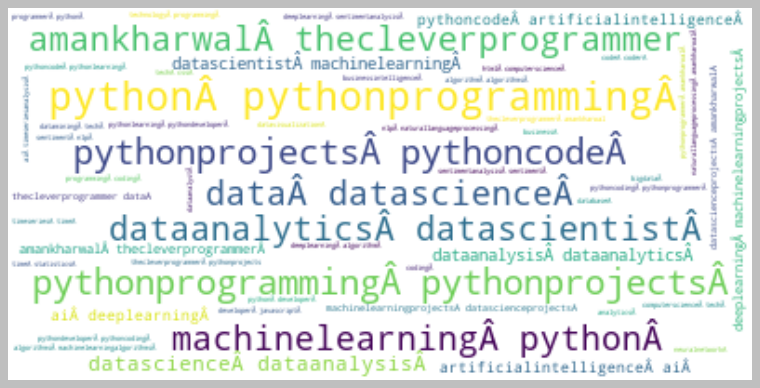

In [ ]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ANALYZING RELATIONSHIPS

 let’s analyze relationships to find the most important factors of our Instagram reach.

 It will also help us in understanding how the Instagram algorithm works.
 
 Let’s have a look at the relationship between the number of likes and the number of impressions on my Instagram posts:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

Above there is a Linear relationship

let’s see the relationship between the number of comments and the number of impressions on my Instagram posts:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

It looks like the number of comments we get on a post doesn’t affect its reach.

 Now let’s have a look at the relationship between the number of shares and the number of impressions:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do. 

Now let’s have a look at the relationship between the number of saves and the number of impressions:

In [ ]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

 Now let’s have a look at the correlation of all the columns with the Impressions column:

In [ ]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
Likes             0.896277
From Hashtags     0.892682
Follows           0.804064
Profile Visits    0.774393
Saves             0.625600
From Followers    0.603378
From Explore      0.498389
Shares            0.476617
From Other        0.429227
Comments          0.247201
Name: Impressions, dtype: float64


So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

ANALYZING CONVERSION RATE

In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post. 

The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100. 

Now let’s have a look at the conversation rate of my Instagram account:

In [ ]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

31.17770767613039


So the conversation rate of my Instagram account is 31% which sounds like a very good conversation rate. 

Let’s have a look at the relationship between the total profile visits and the number of followers gained from all profile visits:

In [ ]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

INSTAGRAM REACH PREDICTION MODEL


I will train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [ ]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares','Profile Visits','Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)

Now here’s is how we can train a machine learning model to predict the reach of an Instagram post using Python:

In [ ]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.7271825201648776

Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [ ]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([7672.93460635])